In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
model = tf.keras.models.Sequential()

In [3]:
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="SAME", strides=1, 
                              input_shape=[28, 28, 1]))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding="SAME"))
model.add(keras.layers.ReLU())
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="SAME", strides=1))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding="SAME"))
model.add(keras.layers.ReLU())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024))
model.add(keras.layers.Dense(10, activation=keras.layers.Softmax()))

In [4]:
(train_dataset, train_label), (test_dataset, test_label) = keras.datasets.mnist.load_data()

In [5]:
model.compile(optimizer=keras.optimizers.Adam(lr=1e-3), 
              loss=tf.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
re_lu (ReLU)                 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
re_lu_1 (ReLU)               (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [18]:
history = model.fit(x = np.expand_dims(train_dataset, axis=3), y = train_label, batch_size=512,
                    epochs=30, validation_data=(np.expand_dims(test_dataset, axis=3), test_label))

Epoch 1/30
118/118 [==============================] - 7s 57ms/step - loss: 12.3324 - accuracy: 0.8313 - val_loss: 0.1905 - val_accuracy: 0.9450
Epoch 2/30
118/118 [==============================] - 7s 58ms/step - loss: 0.1572 - accuracy: 0.9536 - val_loss: 0.1485 - val_accuracy: 0.9567
Epoch 3/30
118/118 [==============================] - 6s 55ms/step - loss: 0.1149 - accuracy: 0.9654 - val_loss: 0.1321 - val_accuracy: 0.9635
Epoch 4/30
118/118 [==============================] - 6s 53ms/step - loss: 0.0962 - accuracy: 0.9712 - val_loss: 0.1245 - val_accuracy: 0.9655
Epoch 5/30
118/118 [==============================] - 6s 54ms/step - loss: 0.0831 - accuracy: 0.9748 - val_loss: 0.1145 - val_accuracy: 0.9692
Epoch 6/30
118/118 [==============================] - 7s 58ms/step - loss: 0.0726 - accuracy: 0.9772 - val_loss: 0.1062 - val_accuracy: 0.9729
Epoch 7/30
118/118 [==============================] - 6s 55ms/step - loss: 0.0662 - accuracy: 0.9800 - val_loss: 0.1091 - val_accuracy: 0.973

In [19]:
history.history

{'loss': [12.33238410949707,
  0.15724468231201172,
  0.11486787348985672,
  0.09615559130907059,
  0.08313044160604477,
  0.07259340584278107,
  0.06623616069555283,
  0.060129694640636444,
  0.05666780844330788,
  0.049383386969566345,
  0.04676271602511406,
  0.04303969815373421,
  0.04700853303074837,
  0.040449898689985275,
  0.048349495977163315,
  0.044682085514068604,
  0.042268384248018265,
  0.03294738382101059,
  0.03796697035431862,
  0.045206233859062195,
  0.04004502668976784,
  0.03852136805653572,
  0.04521239176392555,
  0.05410690978169441,
  0.0377349816262722,
  0.03544517979025841,
  0.04256541654467583,
  0.03448326140642166,
  0.029542086645960808,
  0.029951265081763268],
 'accuracy': [0.8312666416168213,
  0.9535833597183228,
  0.9653666615486145,
  0.9712166786193848,
  0.9747999906539917,
  0.9772166609764099,
  0.9800000190734863,
  0.9823166728019714,
  0.9823833107948303,
  0.9845666885375977,
  0.9855999946594238,
  0.9868999719619751,
  0.985400021076202

In [13]:
model.save("MNIST-Classifier", save_format="tf")

In [14]:
m = keras.models.load_model("MNIST-Classifier")

In [15]:
import plotly.graph_objects as go

In [17]:
history.history.keys()

In [54]:
logs = history.history
data2 = logs

In [ ]:
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 80 #分辨率
plt.rcParams['font.sans-serif'] = ['Monaco']

In [ ]:
ax = sns.lineplot(x = range(len(logs['loss'])), y = logs['loss'], label="loss in trainning")
ax = sns.lineplot(x = range(len(logs['loss'])), y = logs['val_loss'], label="loss in testing")
ax.set_title("Loss")
ax.set_xlabel("epoch")
ax.set_ylabel("loss value")

In [ ]:
ax = sns.lineplot(x = range(len(logs['loss'])), y = logs['accuracy'], label="accuracy in trainset")
ax = sns.lineplot(x = range(len(logs['loss'])), y = logs['val_accuracy'], label="accuracy in testset")
ax.set_title("accuracy")
ax.set_xlabel("epoch")
ax.set_ylabel("accuracy")

Text(0, 0.5, 'loss value')

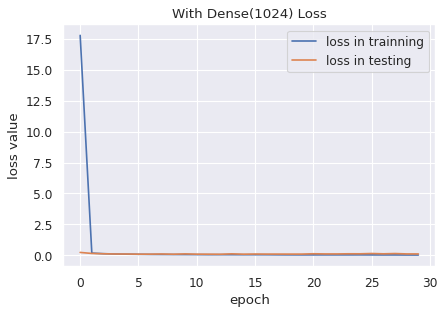

In [22]:
ax = sns.lineplot(x = range(len(logs['loss'])), y = logs['loss'], label="loss in trainning")
ax = sns.lineplot(x = range(len(logs['loss'])), y = logs['val_loss'], label="loss in testing")
ax.set_title("With Dense(1024) Layer Loss")
ax.set_xlabel("epoch")
ax.set_ylabel("loss value")

Text(0, 0.5, 'accuracy')

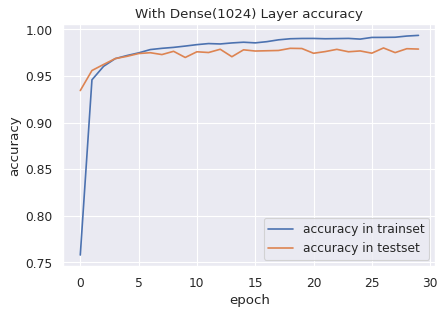

In [23]:
ax = sns.lineplot(x = range(len(logs['loss'])), y = logs['accuracy'], label="accuracy in trainset")
ax = sns.lineplot(x = range(len(logs['loss'])), y = logs['val_accuracy'], label="accuracy in testset")
ax.set_title("With Dense(1024) Layer accuracy")
ax.set_xlabel("epoch")
ax.set_ylabel("accuracy")

In [38]:
data1 = logs

In [72]:
line1 = go.Scatter(x = np.arange(len(logs['loss'])) + 1, y = data1['accuracy'], 
                         name="accuracy in trainset with dense1024")
line2 = go.Scatter(x = np.arange(len(logs['loss'])) + 1, y = data2['accuracy'], 
                         name="accuracy in trainset without dense1024")         
fig = go.Figure([line1, line2])
fig.update_layout(xaxis_title="epoch", yaxis_title="accuracy")
fig.show()

In [73]:
line1 = go.Scatter(x = np.arange(len(logs['loss'])) + 1, y = data1['val_accuracy'], 
                         name="accuracy in trainset with dense1024")
line2 = go.Scatter(x = np.arange(len(logs['loss'])) + 1, y = data2['val_accuracy'], 
                         name="accuracy in trainset without dense1024")         
fig = go.Figure([line1, line2])
fig.update_layout(xaxis_title="epoch", yaxis_title="accuracy")
fig.show()

In [85]:
line1 = go.Scatter(x = np.arange(len(logs['loss'])) + 1, y = data1['loss'], 
                         name="train loss in trainset with dense1024")
line2 = go.Scatter(x = np.arange(len(logs['loss'])) + 1, y = data2['loss'], 
                         name="train loss in trainset without dense1024")         
fig = go.Figure([line1, line2])
fig.update_layout(xaxis_title="epoch", yaxis_title="loss")
fig.show()

In [75]:
line1 = go.Scatter(x = np.arange(len(logs['loss'])) + 1, y = data1['val_loss'], 
                         name="train loss in trainset with dense1024")
line2 = go.Scatter(x = np.arange(len(logs['loss'])) + 1, y = data2['val_loss'], 
                         name="train loss in trainset without dense1024")         
fig = go.Figure([line1, line2])
fig.update_layout(xaxis_title="epoch", yaxis_title="loss")
fig.show()